In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

In [2]:
#Finding the version of libraries we are using
print("Panda version : {0}".format(pd.__version__))
print("Seaborn version : {0}".format(sns.__version__))
print("Matplotlib version : {0}".format(matplotlib.__version__))
print("Numpy version : {0}".format(np.__version__))

Panda version : 0.22.0
Seaborn version : 0.8.1
Matplotlib version : 2.2.2
Numpy version : 1.15.2


In [3]:
#Pre-defining the default plots
plt.style.use('ggplot')
plt.rcParams['font.size']=12
plt.rcParams['patch.edgecolor']="k"

In [4]:
#To accommodate maximum number of colums in Jupyter
pd.options.display.max_columns = 20

In [5]:
#Reading the file
data = pd.read_csv("Housing_Data.csv")

In [6]:
#Glimpse at data
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
data.shape

(20640, 10)

In [8]:
#Data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
#Data Structure..this will produce on for categorical values
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
#Categorical, Integer and Float type variables
cat_var = data.select_dtypes(include='object').columns.tolist()
print(cat_var)
int_var = data.select_dtypes(include='int64').columns.tolist()
print(int_var)
float_var = data.select_dtypes(include='float64').columns.tolist()
print(float_var)

['ocean_proximity']
[]
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']


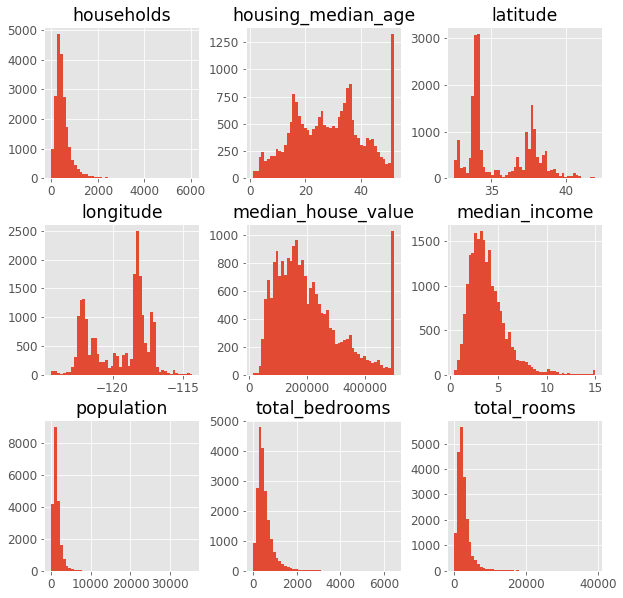

In [21]:
#Looking at the distibution and spread of the data
data.hist(figsize=(10,10), bins=50)
plt.show()

In [11]:
#For categorical variables
Counter(data.ocean_proximity)

Counter({'<1H OCEAN': 9136,
         'INLAND': 6551,
         'ISLAND': 5,
         'NEAR BAY': 2290,
         'NEAR OCEAN': 2658})

In [12]:
#Looking at missing values
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [13]:
#Taking the index values of missing value for the variable
bed_null = data[data["total_bedrooms"].isnull()].index.tolist()
print(bed_null)

[290, 341, 538, 563, 696, 738, 1097, 1350, 1456, 1493, 1606, 2028, 2115, 2301, 2323, 2334, 2351, 2412, 2420, 2578, 2608, 2647, 2826, 3024, 3328, 3354, 3376, 3482, 3485, 3529, 3721, 3778, 3912, 3921, 3958, 4043, 4046, 4186, 4279, 4309, 4391, 4447, 4496, 4591, 4600, 4629, 4667, 4691, 4738, 4743, 4744, 4767, 4852, 5059, 5216, 5222, 5236, 5654, 5665, 5678, 5723, 5751, 5990, 6052, 6068, 6220, 6241, 6253, 6298, 6421, 6541, 6590, 6814, 6835, 6962, 7097, 7113, 7168, 7191, 7228, 7316, 7330, 7547, 7654, 7668, 7763, 7806, 8337, 8383, 8530, 8915, 9149, 9571, 9620, 9622, 9814, 9845, 9877, 9942, 9970, 10033, 10216, 10236, 10385, 10389, 10428, 10495, 10761, 10885, 10915, 11096, 11311, 11351, 11441, 11449, 11512, 11741, 12101, 12414, 12570, 12809, 13015, 13069, 13311, 13332, 13336, 13597, 13656, 13706, 13925, 13932, 13933, 14015, 14152, 14173, 14307, 14331, 14386, 14462, 14521, 14641, 14930, 14970, 14986, 15030, 15060, 15118, 15137, 15397, 15479, 15607, 15663, 15890, 15975, 16025, 16038, 16104, 16105,

In [14]:
data.total_bedrooms.mean(), data.total_bedrooms.median()

(537.8705525375618, 435.0)

In [15]:
#Removing the rows whose value is null
data = data.dropna(subset=["total_bedrooms"])
data.shape

(20433, 10)

In [16]:
data.describe() #after removing nan values

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


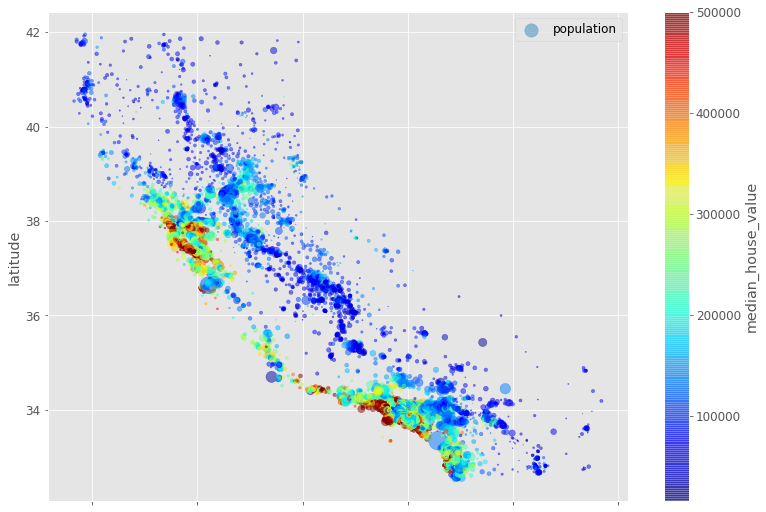

In [17]:
#Visualizing the median house value on heatmap 
data.plot(kind='scatter', x="longitude", y="latitude", figsize=(13,9), alpha=0.5,
         s=data["population"]/100, label="population", c="median_house_value",
         cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend(loc="best")
plt.show()

HEAT MAP

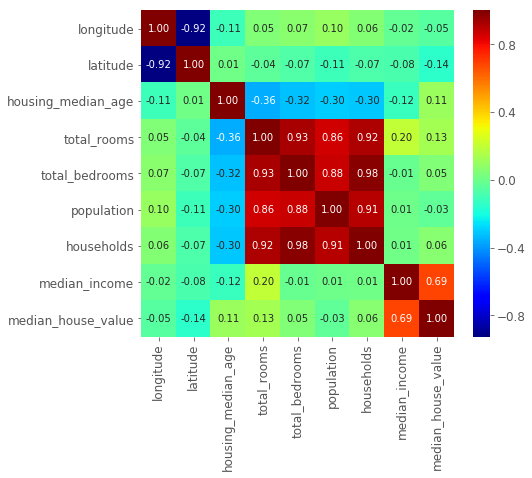

In [18]:
plt.figure(figsize=(7,6))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, fmt='0.2f', annot_kws={'size':10}, cmap=plt.get_cmap("jet"))

In [19]:
#Co-relation with target value
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688355
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
population           -0.025300
longitude            -0.045398
latitude             -0.144638
Name: median_house_value, dtype: float64

In [20]:
#Encoding the object variable with integer values
target = {"<1H OCEAN":1, "INLAND":2, "NEAR OCEAN":3, "NEAR BAY":4, "ISLAND":5}
data["ocean_proximity"] = data["ocean_proximity"].apply(lambda x: target[x])

In [21]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,4
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,4
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,4
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,4


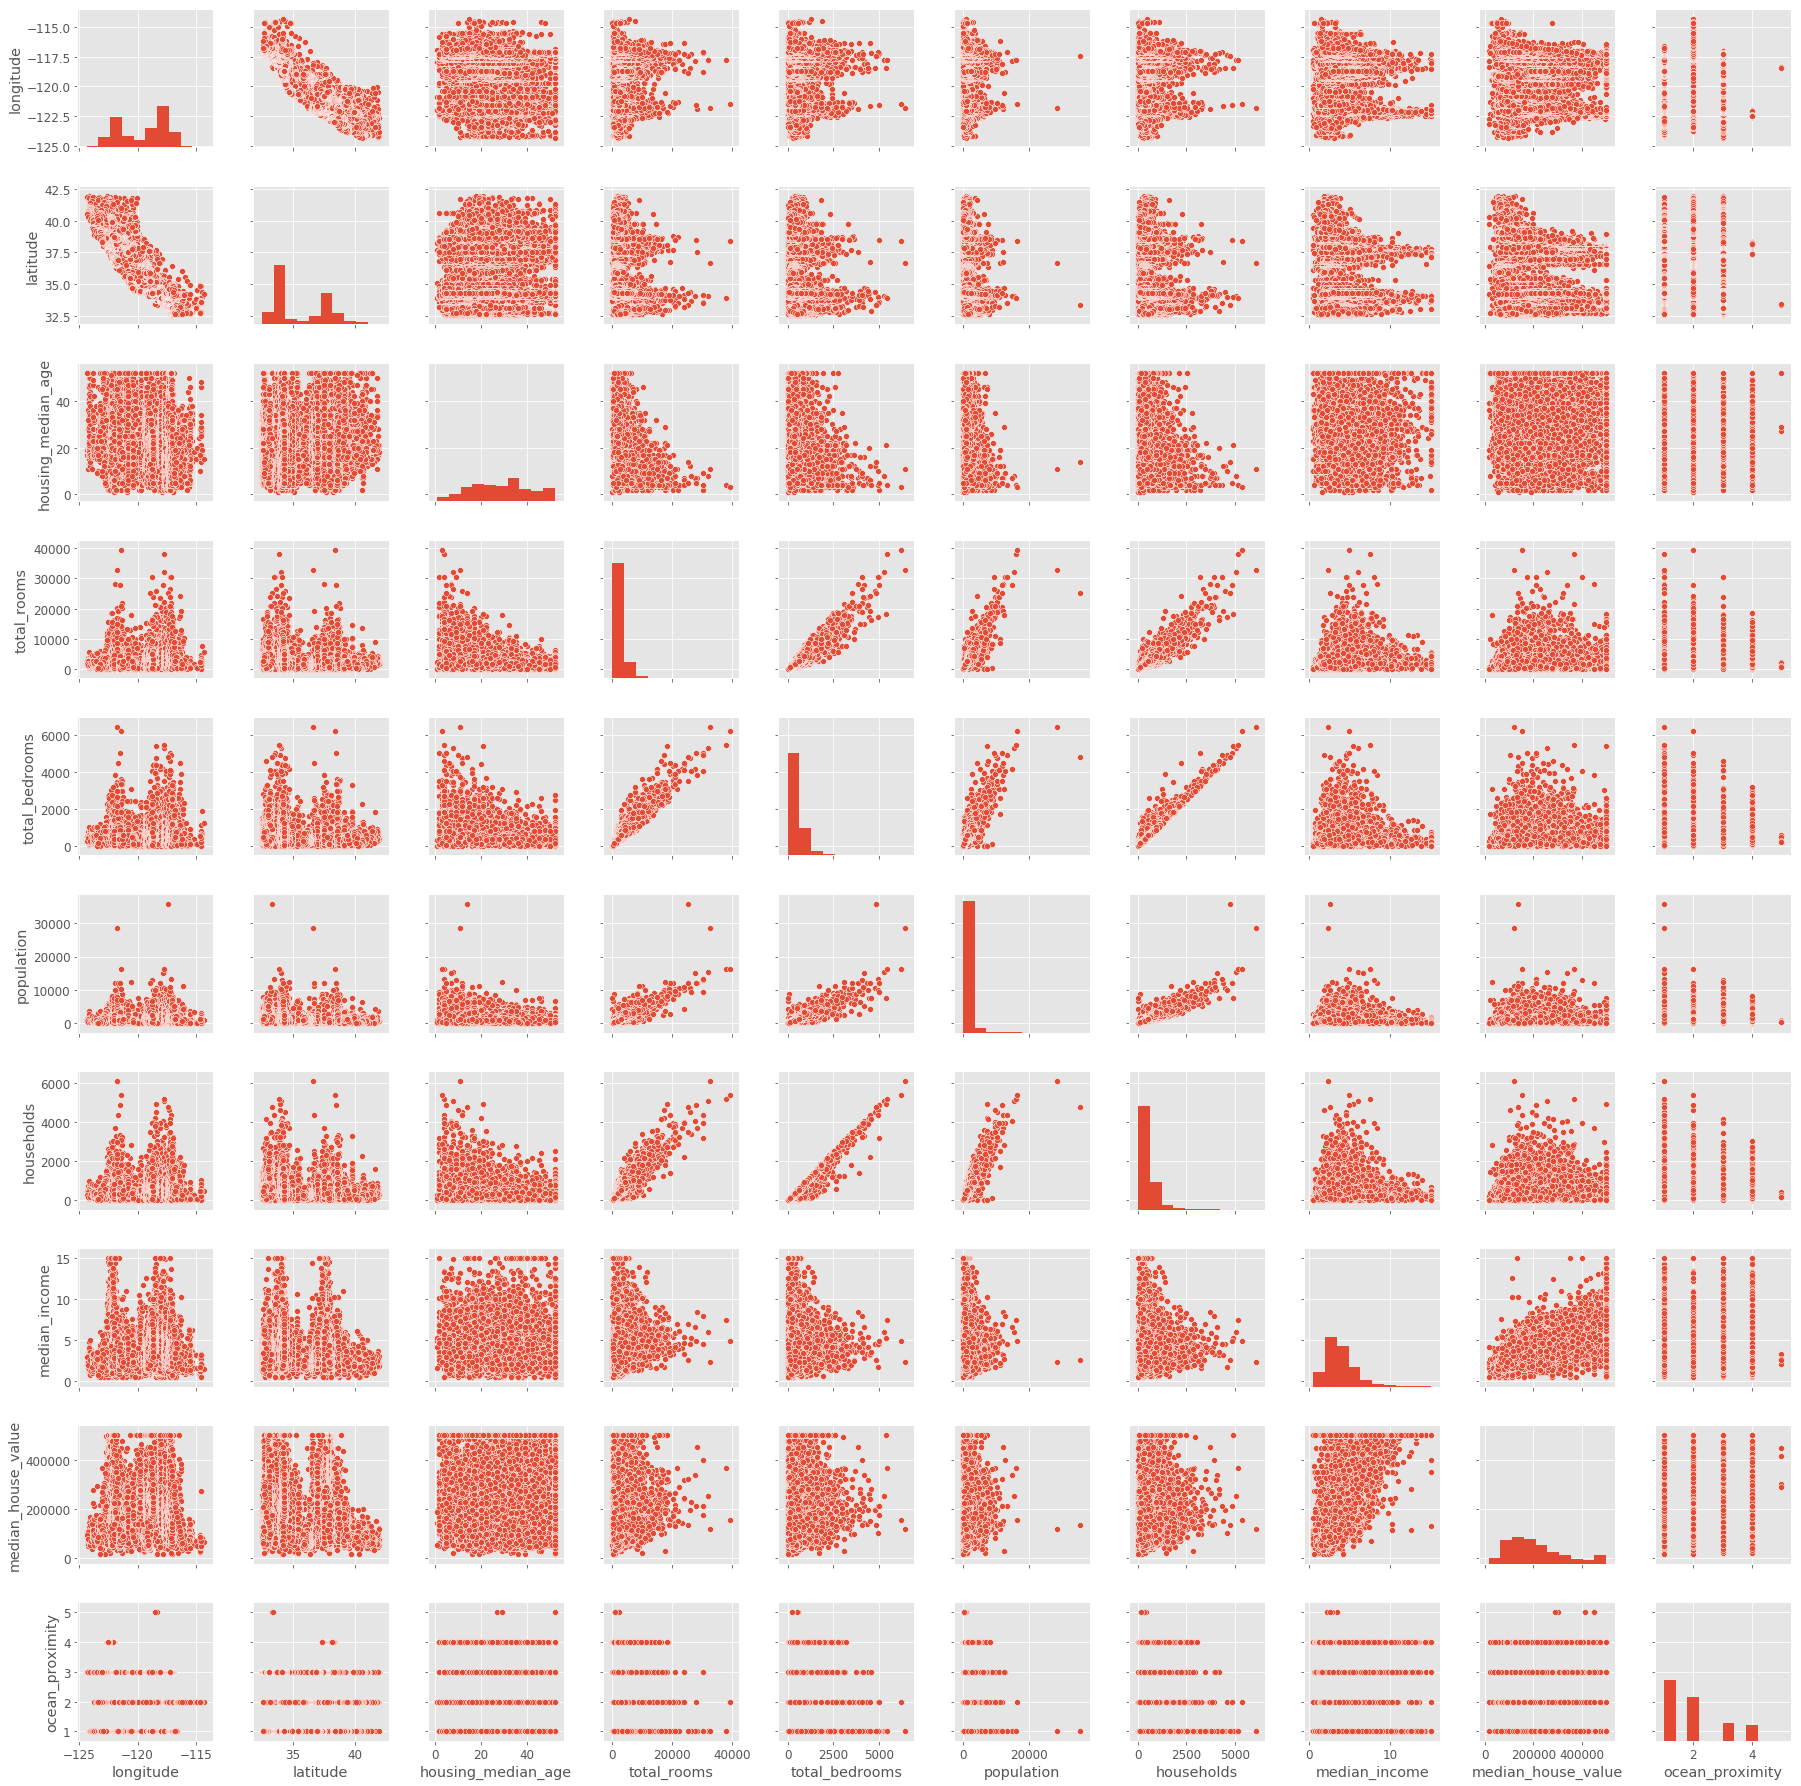

In [110]:
sns.pairplot(data)

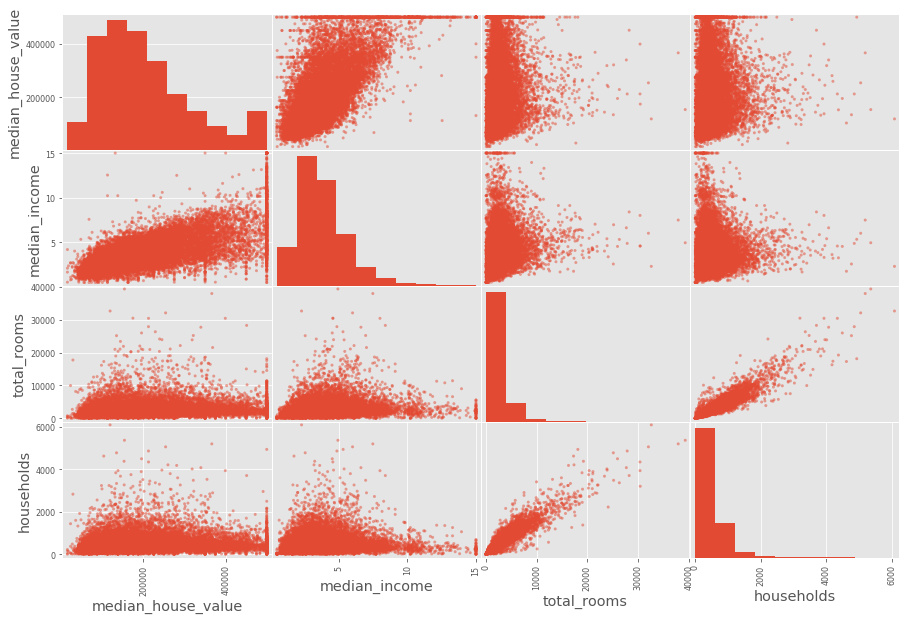

In [22]:
#Plotting
from pandas.tools.plotting import scatter_matrix

attributes = ["median_house_value","median_income","total_rooms","households"]
scatter_matrix(data[attributes], figsize=(15,10))
plt.show()

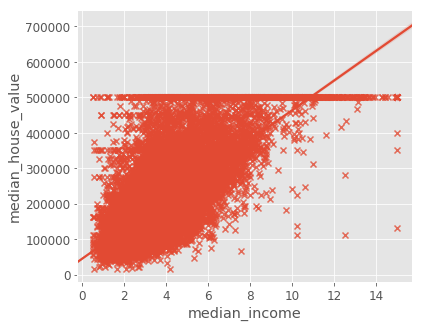

In [25]:
#data.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.5, figsize=(8,6))
plt.figure(figsize=(6,5))
sns.regplot(x="median_income", y="median_house_value", data=data, marker="x")
#plt.show()
#Veru strong relation can be seen here

FEATURE ENGINEERING

In [26]:
#CREATING NEW ATRRIBUTES
data["rooms_per_households"] = data["total_rooms"]/data["households"]
data["bedrooms_per_room"] = data["total_bedrooms"]/data["total_rooms"]
data["population_per_household"] = data["population"]/data["households"]

In [27]:
data.shape

(20433, 13)

In [28]:
corr_matrix = data.corr()

In [29]:
corr_matrix["median_house_value"].sort_values(ascending=False)  

median_house_value          1.000000
median_income               0.688355
rooms_per_households        0.151344
total_rooms                 0.133294
housing_median_age          0.106432
households                  0.064894
total_bedrooms              0.049686
ocean_proximity             0.020952
population_per_household   -0.023639
population                 -0.025300
longitude                  -0.045398
latitude                   -0.144638
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

CREATING DUMMY VARIABLES FOR OCEAN_PROXIMITY

In [30]:
dummy = pd.get_dummies(data["ocean_proximity"], prefix='Ocean_').iloc[:,:-1]
data = pd.concat([data,dummy], axis=1)
data = data.drop("ocean_proximity", axis=1)
data.shape

(20433, 16)

In [114]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_households,bedrooms_per_room,population_per_household,Ocean__1,Ocean__2,Ocean__3,Ocean__4
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556,0,0,0,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842,0,0,0,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260,0,0,0,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945,0,0,0,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467,0,0,0,1


SPLITTING DATASET WITH STRATIFIED SHUFFLE SPLIT

In [31]:
#Very important concept
data["income_cat"] = np.ceil(data["median_income"]/1.5)
data["income_cat"].where(data["income_cat"]<5, 5.0, inplace=True)

In [32]:
Counter(data.income_cat)

Counter({1.0: 814, 2.0: 6515, 3.0: 7156, 4.0: 3611, 5.0: 2337})

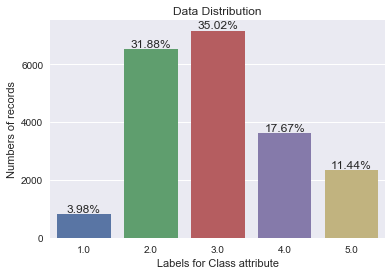

In [33]:
sns.set()
total_len = len(data["income_cat"])
sns.countplot(data.income_cat).set_title("Data Distribution")
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100*(height/total_len)),
            fontsize=12, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("Labels for Class attribute")
ax.set_ylabel("Numbers of records")
plt.show()

In [34]:
#Splitting the dataset using Stratified Shuffle Split
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["income_cat"]):
    strat_train_set = data.iloc[train_index]
    strat_test_set = data.iloc[test_index]

In [35]:
#Looking at the distrbution in the basis of Stratified Split
data["income_cat"].value_counts()/len(data["income_cat"])*100

3.0    35.021778
2.0    31.884696
4.0    17.672393
5.0    11.437381
1.0     3.983752
Name: income_cat, dtype: float64

In [36]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set["income_cat"])*100

3.0    35.013457
2.0    31.881576
4.0    17.665770
5.0    11.450942
1.0     3.988255
Name: income_cat, dtype: float64

In [37]:
strat_train_set["income_cat"].value_counts()/len(strat_train_set["income_cat"])*100

3.0    35.023859
2.0    31.885477
4.0    17.674049
5.0    11.433990
1.0     3.982626
Name: income_cat, dtype: float64

In [38]:
#Now dropping the column from original dataset
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [39]:
data = data.drop('income_cat', axis=1)
data.shape

(20433, 16)

In [40]:
strat_train_set.shape, strat_test_set.shape

((16346, 16), (4087, 16))

In [41]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_households,bedrooms_per_room,population_per_household,Ocean__1,Ocean__2,Ocean__3,Ocean__4
18052,-121.98,37.25,19.0,755.0,93.0,267.0,99.0,15.0000,500001.0,7.626263,0.123179,2.696970,1,0,0,0
17555,-121.87,37.33,37.0,3137.0,685.0,2048.0,651.0,3.0156,270300.0,4.818740,0.218361,3.145929,1,0,0,0
19195,-122.68,38.44,36.0,1311.0,259.0,648.0,268.0,3.4545,161200.0,4.891791,0.197559,2.417910,1,0,0,0
17808,-121.87,37.41,17.0,3719.0,588.0,2089.0,561.0,6.7867,273700.0,6.629234,0.158107,3.723708,1,0,0,0
10265,-117.85,33.90,25.0,1548.0,256.0,811.0,263.0,5.2037,242200.0,5.885932,0.165375,3.083650,1,0,0,0


In [42]:
X_train = strat_train_set.drop("median_house_value", axis=1)
y_train = strat_train_set.iloc[:,strat_train_set.columns == "median_house_value"]
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set.iloc[:,strat_test_set.columns == "median_house_value"]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16346, 15), (4087, 15), (16346, 1), (4087, 1))

LINEAR REGRESSION

In [43]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
y_pred_LR = regressor.predict(X_test)

In [104]:
from sklearn.metrics import mean_squared_error, r2_score
lin_mse_LR = mean_squared_error(y_test, y_pred_LR)
print(lin_mse_LR)
lin_rmse_LR = np.sqrt(lin_mse_LR)
print(lin_rmse_LR)
std_dev_LR = np.std(y_pred_LR)
print(std_dev_LR)
R2_score_LR = r2_score(y_test, y_pred_LR)
print(R2_score_LR*100)

4427337395.415956
66538.24009857756
91718.14584813638
66.29096768673072


In [46]:
D1 = pd.DataFrame(y_test.reset_index())
D2 = pd.DataFrame(y_pred_LR, columns=["Predicted_Value"])
print(pd.concat([D1, D2], axis=1).head())

   index  median_house_value  Predicted_Value
0  18143            451400.0    356075.733392
1   8101            150800.0    207601.712428
2   8313            360700.0    334567.198946
3   8365            128100.0    205741.792358
4  13188            121800.0    140711.104455


In [105]:
cols = ["MODEL","MSE","RMSE","STD_DEV", "R-SQUARE"]
model_report = pd.DataFrame(columns = cols)

tmp = pd.Series({ "MODEL" : "LINEAR REGRESSOR MODEL",
                  "MSE" : lin_mse_LR,
                  "RMSE" : lin_rmse_LR,
                  "STD_DEV" : std_dev_LR,
                  "R-SQUARE" : R2_score_LR*100})
model_LR_report = model_report.append(tmp, ignore_index=True)
model_LR_report

,MODEL,MSE,RMSE,STD_DEV,R-SQUARE
0,LINEAR REGRESSOR MODEL,4.427337e+09,66538.240099,91718.145848,66.290968


DECISION TREE REGRESSOR

In [53]:
from sklearn.tree import DecisionTreeRegressor
regressor1 = DecisionTreeRegressor(max_depth=7,random_state=42)
regressor1.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [54]:
y_pred_DT = regressor1.predict(X_test)

In [101]:
from sklearn.metrics import mean_squared_error, r2_score
lin_mse_DT = mean_squared_error(y_test, y_pred_DT)
print(lin_mse_DT)
lin_rmse_DT = np.sqrt(lin_mse_DT)
print(lin_rmse_DT)
std_dev_DT = np.std(y_pred_DT)
print(std_dev_DT)
R2_score_DT = r2_score(y_test, y_pred_DT)
print(R2_score_DT*100)

3795074541.5663233
61604.17633217997
97920.72459503535
71.10491500255185


In [102]:
D1 = pd.DataFrame(y_test.reset_index())
D2 = pd.DataFrame(y_pred_DT, columns=["Predicted_Value"])
print(pd.concat([D1, D2], axis=1).head())

   index  median_house_value  Predicted_Value
0  18143            451400.0    319461.223881
1   8101            150800.0    172093.507792
2   8313            360700.0    477445.135802
3   8365            128100.0    172093.507792
4  13188            121800.0    128415.972222


In [103]:
cols = ["MODEL","MSE","RMSE","STD_DEV", "R-SQUARE"]
model_report = pd.DataFrame(columns = cols)

tmp = pd.Series({ "MODEL" : "DECISIONTREE REGRESSOR MODEL",
                  "MSE" : lin_mse_DT,
                  "RMSE" : lin_rmse_DT,
                  "STD_DEV" : std_dev_DT,
                  "R-SQUARE" : R2_score_DT*100})
model_DT_report = model_report.append(tmp, ignore_index=True)
model_DT_report

,MODEL,MSE,RMSE,STD_DEV,R-SQUARE
0,DECISIONTREE REGRESSOR MODEL,3.795075e+09,61604.176332,97920.724595,71.104915


RANDOM FOREST REGRESSOR

In [108]:
from sklearn.ensemble import RandomForestRegressor
regressor3 = RandomForestRegressor(n_estimators=500,max_depth=7, random_state=42)
regressor3.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [109]:
y_pred_RF = regressor3.predict(X_test)

In [110]:
from sklearn.metrics import mean_squared_error, r2_score
lin_mse_RF = mean_squared_error(y_test, y_pred_RF)
print(lin_mse_RF)
lin_rmse_RF = np.sqrt(lin_mse_RF)
print(lin_rmse_RF)
std_dev_RF = np.std(y_pred_RF)
print(std_dev_RF)
R2_score_RF = r2_score(y_test, y_pred_RF)
print(R2_score_RF*100)

3296360846.8127084
57413.9429652128
95621.03682453244
74.90204057715243


In [111]:
D1 = pd.DataFrame(y_test.reset_index())
D2 = pd.DataFrame(y_pred_RF, columns=["Predicted_Value"])
print(pd.concat([D1, D2], axis=1).head())

   index  median_house_value  Predicted_Value
0  18143            451400.0    379428.683785
1   8101            150800.0    165635.662705
2   8313            360700.0    465618.208930
3   8365            128100.0    195114.808600
4  13188            121800.0    130210.437746


In [112]:
cols = ["MODEL","MSE","RMSE","STD_DEV", "R-SQUARE"]
model_report = pd.DataFrame(columns = cols)

tmp = pd.Series({ "MODEL" : "RANDOMFOREST REGRESSOR MODEL",
                  "MSE" : lin_mse_RF,
                  "RMSE" : lin_rmse_RF,
                  "STD_DEV" : std_dev_RF,
                  "R-SQUARE" : R2_score_RF*100})
model_RF_report = model_report.append(tmp, ignore_index=True)
model_RF_report

,MODEL,MSE,RMSE,STD_DEV,R-SQUARE
0,RANDOMFOREST REGRESSOR MODEL,3.296361e+09,57413.942965,95621.036825,74.902041


XGBOOST REGRESSOR

In [63]:
import xgboost as xgb

In [80]:
xg_clf = xgb.XGBRegressor(objective='reg:linear', learning_rate=0.1, max_depth=5, n_estimators=50,
                          colsample_bytree=0.9, random_state=0)

In [81]:
xg_clf.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [82]:
y_pred_XG = xg_clf.predict(X_test)

In [95]:
from sklearn.metrics import mean_squared_error, r2_score
lin_mse_XG = mean_squared_error(y_test, y_pred_XG)
print(lin_mse_XG)
lin_rmse_XG = np.sqrt(lin_mse)
print(lin_rmse_XG)
std_dev_XG = np.std(y_pred_XG)
print(std_dev_XG)
R2_score_XG = r2_score(y_test, y_pred_XG)
print(R2_score_XG*100)

2519926777.818791
66538.24009857756
98742.625
80.81368425444217


In [84]:
D1 = pd.DataFrame(y_test.reset_index())
D2 = pd.DataFrame(y_pred_XG, columns=["Predicted_Value"])
print(pd.concat([D1, D2], axis=1).head())

   index  median_house_value  Predicted_Value
0  18143            451400.0    358603.281250
1   8101            150800.0    159523.671875
2   8313            360700.0    448726.187500
3   8365            128100.0    193899.546875
4  13188            121800.0    141566.703125


In [93]:
cols = ["MODEL","MSE","RMSE","STD_DEV", "R-SQUARE"]
model_report = pd.DataFrame(columns = cols)

tmp = pd.Series({ "MODEL" : "XGBOOST REGRESSOR MODEL",
                  "MSE" : lin_mse_XG,
                  "RMSE" : lin_rmse_XG,
                  "STD_DEV" : std_dev_XG,
                  "R-SQUARE" : R2_score_XG*100})
model_XG_report = model_report.append(tmp, ignore_index=True)
model_XG_report

,MODEL,MSE,RMSE,STD_DEV,R-SQUARE
0,XGBOOST REGRESSOR MODEL,2.519927e+09,66538.240099,98742.625,80.813684


COMPLIED

In [113]:
cols = ["MODEL","MSE","RMSE","STD_DEV", "R-SQUARE"]
model_report = pd.DataFrame(columns = cols)
final_report = pd.concat([model_LR_report,model_DT_report,model_RF_report,model_XG_report], ignore_index=True)
final_report

,MODEL,MSE,RMSE,STD_DEV,R-SQUARE
0,LINEAR REGRESSOR MODEL,4.427337e+09,66538.240099,91718.145848,66.290968
1,DECISIONTREE REGRESSOR MODEL,3.795075e+09,61604.176332,97920.724595,71.104915
2,RANDOMFOREST REGRESSOR MODEL,3.296361e+09,57413.942965,95621.036825,74.902041
3,XGBOOST REGRESSOR MODEL,2.519927e+09,66538.240099,98742.625000,80.813684
